# Projeto 2

### 1 –Considere os dados gerados com a função:
### skdata.make_moons(n_samples=n_samples, noise=p)
### Construa um gráfico da acurácia versus a taxa de ruído  para os algoritmos random  forest  e  redes  neurais.  Considerem  uma  média  de  ao  menos  10 simulações.

Vamos gerar um conjunto de dados para analisar os classificadores:

In [1]:
import random
random.seed(1) # define the seed (important to reproduce the results)
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def randomForestMeanScore (X, Y, p = 0.7):
    s = []
    for i in range(0, 10):
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
        rf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
        rf.fit(train_x, train_y)
        pred_y = rf.predict(test_x)
        s.append(accuracy_score(pred_y, test_y))
    return np.mean(s)


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def neuralNetworkMeanScore (X, Y, p = 0.7):
    s = []
    for i in range(0, 10):
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
        scaler = MinMaxScaler()  
        scaler.fit(train_x)  
        train_x = scaler.transform(train_x)  
        # apply same transformation to test data
        test_x = scaler.transform(test_x) 
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 200), random_state=1)# Train the model on training data
        clf.fit(train_x, train_y);
        pred_y = clf.predict(test_x)
        s.append(accuracy_score(pred_y, test_y))
    return np.mean(s)

In [4]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
n_samples = 200
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-4, 0), (0, 0), (3, 3)]

acuracia_rf = []
acuracia_nn = []
noise = []

for i in np.arange(0, 1, 0.1):
    noise.append(i)
    X, y = skdata.make_moons(n_samples=n_samples, noise=i)
    

    d = np.column_stack((X,np.transpose(y)))
    data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
    features_names = ['X1', 'X2']

    Y = np.array(data[data.columns[-1]],dtype=str)
    data= data.drop(data.columns[-1], axis = 1)
    feature_list = list(data.columns)
    X = np.array(data)
    
    acuracia_rf.append(randomForestMeanScore (X, Y, p = 0.7))
    acuracia_nn.append(neuralNetworkMeanScore(X, Y, p = 0.7))   

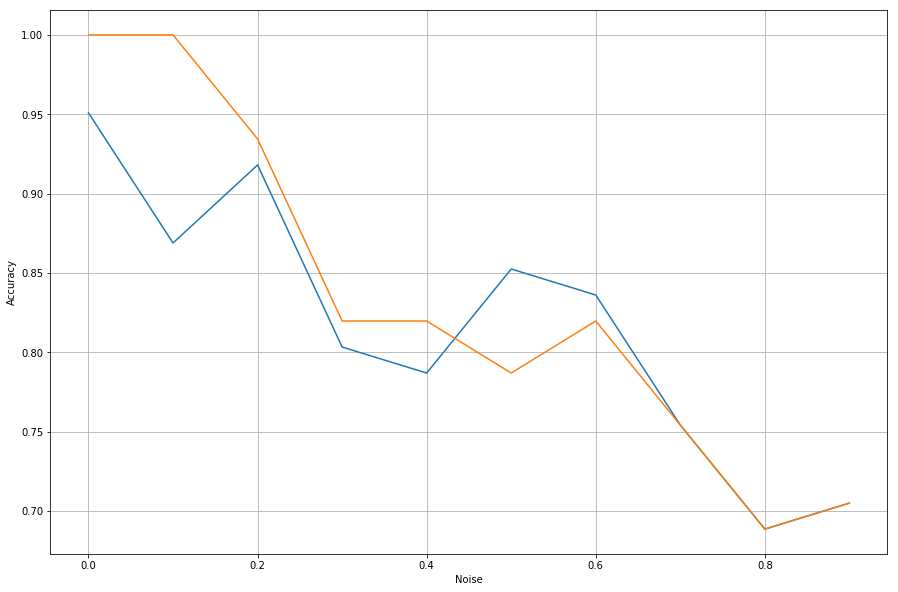

In [5]:
plt.figure(figsize=(15,10))
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.plot(noise, acuracia_rf)
plt.plot(noise, acuracia_nn)
plt.grid(True)
plt.show(True)

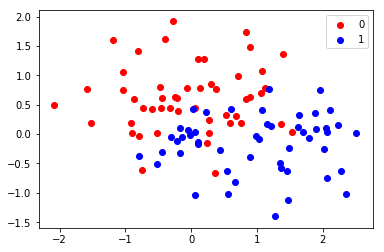

In [6]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
n_samples = 100
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_moons(n_samples=n_samples, noise=0.5)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

Vamos construir as variáveis X e Y, sendo que o processo classificação se resume em estimar a função f na relação Y=f(X)+$\epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

In [7]:
Y = np.array(data[data.columns[-1]],dtype=str)

# Remove the labels from the features
# axis 1 refers to the columns
data = data.drop(data.columns[-1], axis = 1)

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
X = np.array(data)

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#### Conjuntos de teste e treinamento

Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)

A partir desses dados, podemos realizar o processo de classificação.

### 2 - No caso do algoritmo random forest, faça um gráfico da acurácia em função do número de árvores para a base Vehicle. Considere uma média de ao menos 10 simulações. Veja o exemplo acima.

### 3 - Verifique a influencia do número de camadas da rede neural na classificação para a base Vehicle. Considere o exemplo mostrado acima.

### 4 - Analise outras função que definem o parâmetro solver da rede neural e compare os resultados para a base Vehicle. Isto, considere os casos: solver= {‘lbfgs’, ‘sgd’, ‘adam’}. Considere a rede neural com a melhor configuração (número de camadas) no exercício anterior.

### 5 - Verifique a influência do tamanho do conjunto de treinamento nos classificadores random forest e neural networks. Essa análise é semelhante à realizada no projeto 1.